In [1]:
%matplotlib inline
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt

import vdmlab as vdm
from core import Rat, vdm_assign_label, combine_rats
from load_data import get_events
from plotting import plot_behavior

In [2]:
output_filepath = 'C:/Users/Emily/code/emi_biconditional/plots'

In [3]:
import info.RH01d1 as RH01d1
import info.RH01d2 as RH01d2

In [7]:
events = get_events(RH01d1.event_mat)
events.keys()

dict_keys(['pb_on', 'stop_recording', 'feeder', 'noise_off', 'main_off', 'pb_off', 'tone_off', 'tone_on', 'noise_on', 'start_recording', 'type', 'house', 'label', 'cue'])

In [ ]:
import info.check as check

In [ ]:
events = get_events(check.event_mat)

In [ ]:
events.keys()

In [ ]:
rats_data = vdm_assign_label(events)

In [ ]:
for key in rats_data:
    print(key, ':', np.mean(rats_data[key].durations))

In [ ]:
for key in rats_data:
    print(key, ':', rats_data[key].durations)

In [ ]:
events['cue']

In [ ]:
events['cue_off'] = []
for on in events['cue']:
    for off in events['main_off']:
        if np.allclose(on+10, off, atol=0.5):
            events['cue_off'].append(off)
events['cue_off'] = np.array(events['cue_off'])
events['cue_off']

In [ ]:
i = 0
events['cue_off'][i] - events['cue'][i]

In [ ]:
events['house']

In [ ]:
max_flash = 1.6
between_flashes = np.diff(events['house'])
events['house_on'] = [events['house'][0]]
trial_idx = np.where(between_flashes > max_flash)[0]
events['house_on'].extend(events['house'][trial_idx+1])
events['house_on'] = np.array(events['house_on'])
events['house_on']

In [ ]:
events['flash_off'] = []
events['flash_off'].extend(events['house'][trial_idx])
events['flash_off'].append(events['house'][-1])
events['flash_off']

In [ ]:
events['house_off'] = []
for last in events['flash_off']:
    for off in events['main_off']:
        if np.allclose(last, off, atol=0.5):
            events['house_off'].append(off)
events['house_off'] = np.array(events['house_off'])
events['house_off']

In [ ]:
i = 0
events['house_off'][i] - events['house_on'][i]

In [18]:
def correct_timestamps(events):
    events['cue_on'] = events['cue']
    
    events['cue_off'] = []
    for on in events['cue_on']:
        for off in events['main_off']:
            if np.allclose(on+10, off, atol=0.5):
                events['cue_off'].append(off)
    events['cue_off'] = np.array(events['cue_off'])
    
    max_flash = 2.0
    between_flashes = np.diff(events['house'])
    events['house_on'] = [events['house'][0]]
    trial_idx = np.where(between_flashes > max_flash)[0]
    events['house_on'].extend(events['house'][trial_idx+1])
    events['house_on'] = np.array(events['house_on'])
    
    events['house_off'] = []
    events['house_off'].extend(events['house'][trial_idx])
    events['house_off'].append(events['house'][-1])
    events['house_off'] = np.array(events['house_off'])
    
    return events

In [19]:
events = correct_timestamps(events)


In [25]:
this_rat = '1'

rats = [this_rat]
data = dict()
data[this_rat] = Rat(this_rat)

sessions = [RH01d1, RH01d2]

for session in sessions:
    events = get_events(session.event_mat)
    events = correct_timestamps(events)
    
    rats_data = vdm_assign_label(events)

    data[this_rat].add_session(**rats_data, n_unique=2, delay=5.0, tolerance=1.7)
    
n_sessions = len(data[this_rat].sessions)

df = combine_rats(data, rats, n_sessions)

In [26]:
df.head()

,condition,cue,measure,rat,rewarded,session,trial,trial_type,value
0,light 1,light,durations,1,light unrewarded,1,"1, 0",1,0.0000
1,light 1,light,numbers,1,light unrewarded,1,"1, 0",1,0.0000
2,light 1,light,latency,1,light unrewarded,1,"1, 0",1,10.0000
3,light 1,light,responses,1,light unrewarded,1,"1, 0",1,0.0000
4,sound 1,sound,durations,1,sound unrewarded,1,"1, 1",1,1.7681


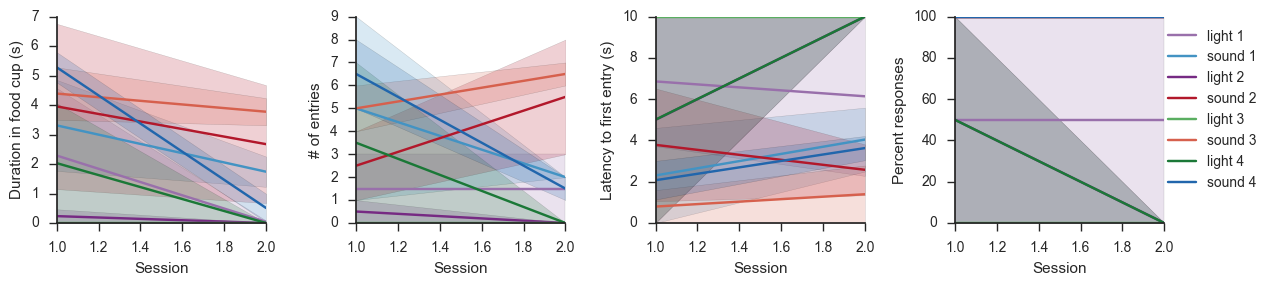

In [27]:
filename = 'vdmlab_trials_rat1_behavior.png'
filepath = os.path.join(output_filepath, filename)
plot_behavior(df, ['1'], filepath=None, only_sound=False, by_outcome=False)